## 📥 Load Sales CSV and Convert to SQLite Database

In this step, we:
- Load the sales data from a CSV file using `pandas`.
- Create a local SQLite database (`sales_data.sqlite`) for SQL-based exploration.
- Store the data into a SQLite table named `sales_data`.

This makes it easier to query and analyze the dataset using SQL in VS Code or Jupyter.

In [49]:
import pandas as pd
import sqlite3

# Load the CSV file into a DataFrame
csv_file = 'sales_data.csv'
sales_data = pd.read_csv(csv_file)

# Create a SQLite database and write the data to a table
conn = sqlite3.connect('sales_data.sqlite')
sales_data.to_sql('sales_data', conn, if_exists='replace', index=False)
conn.close()

# Preview the loaded data
sales_data.head()


,date,region,sales_rep,product_category,units_sold,unit_price,total_revenue,profit
0,2024-11-05,East,John Pierce,Furniture,5,38.46,192.30,26.95
1,2024-04-05,South,Stephanie Ross,Furniture,5,99.09,495.45,170.92
2,2024-05-25,West,Justin Baker,Office Supplies,5,153.15,765.75,222.14
3,2025-05-18,North,Justin Baker,Furniture,5,307.70,1538.50,536.69
4,2024-07-26,North,Ethan Adams,Clothing,5,345.27,1726.35,462.58


## 🧹 Data Type Conversion and Cleaning

To ensure accurate analysis, we convert several columns to their appropriate data types:

- `units_sold` → `int`: Number of units sold should be an integer.
- `unit_price`, `total_revenue`, `profit` → `float`: Monetary values require float precision.
- `date` → `datetime`: Converted to `datetime` format to enable time-based analysis.

We also use `errors='coerce'` for date parsing to safely handle invalid date entries by converting them to `NaT` (Not a Time).

In [ ]:
# Convert data types for analysis
sales_data['units_sold'] = sales_data['units_sold'].astype(int)
sales_data['unit_price'] = sales_data['unit_price'].astype(float)
sales_data['total_revenue'] = sales_data['total_revenue'].astype(float)
sales_data['profit'] = sales_data['profit'].astype(float)
sales_data['date'] = pd.to_datetime(sales_data['date'], errors='coerce')

# Check the updated data types
print(sales_data.dtypes)

# Preview the cleaned data
sales_data.head()

## 📊 Distribution of Total Revenue

In this visualization, we examine the distribution of the `total_revenue` variable:

- A histogram shows the frequency of revenue values across the dataset.
- A kernel density estimate (KDE) curve is overlaid to highlight the distribution shape.
- A red dashed line marks the **mean**, and a solid green line marks the **median**.

This helps identify skewness, outliers, or unusual patterns in revenue generation.

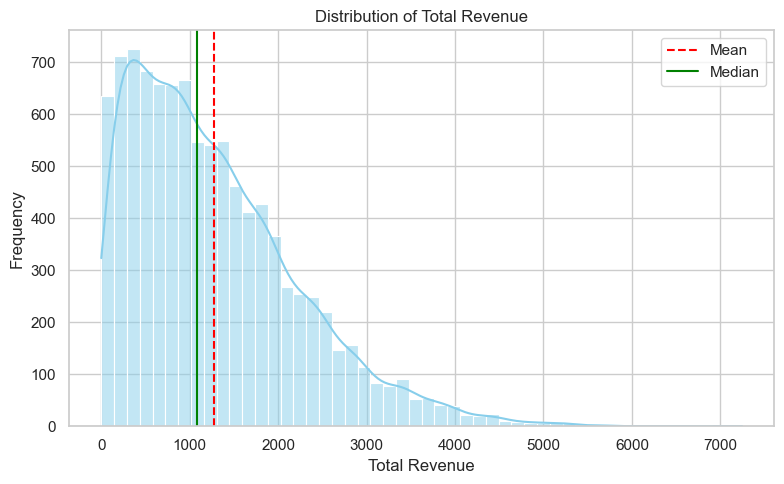

In [53]:
# Load visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Plot the distribution of total revenue
plt.figure(figsize=(8, 5))
sns.histplot(sales_data['total_revenue'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')

# Add mean and median lines
plt.axvline(sales_data['total_revenue'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(sales_data['total_revenue'].median(), color='green', linestyle='-', label='Median')

plt.legend()
plt.tight_layout()
plt.show()

## 📦 Profit by Product Category

This boxplot visualizes the distribution of `profit` across different `product_category` groups:

- Each box shows the interquartile range (IQR) of profits per category.
- The line inside each box represents the median.
- Whiskers and points indicate variability and potential outliers.

This helps compare profitability between product categories and identify which ones consistently perform better or show high variability.

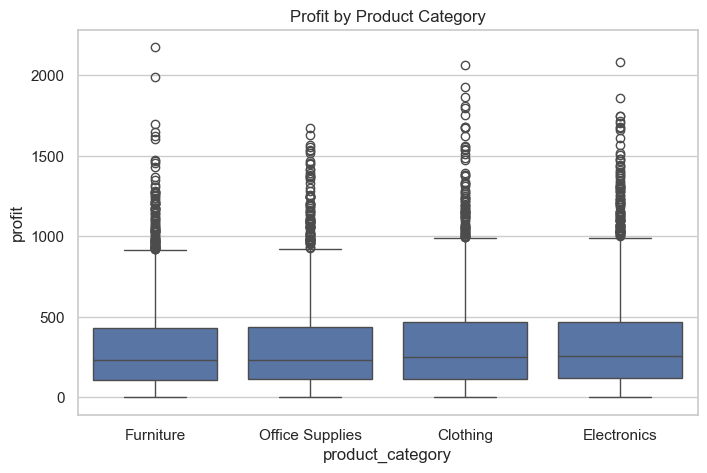

In [56]:
# Boxplot of profit across product categories
plt.figure(figsize=(8, 5))
sns.boxplot(x='product_category', y='profit', data=sales_data)
plt.title('Profit by Product Category')
plt.show()

## 📈 Total Revenue Over Time

This line plot shows how `total_revenue` changes over time:

- Revenue values are aggregated by day.
- The time series plot helps identify trends, seasonality, or spikes in sales performance.

This visualization is useful for monitoring business growth, sales cycles, and unusual events that impact revenue.

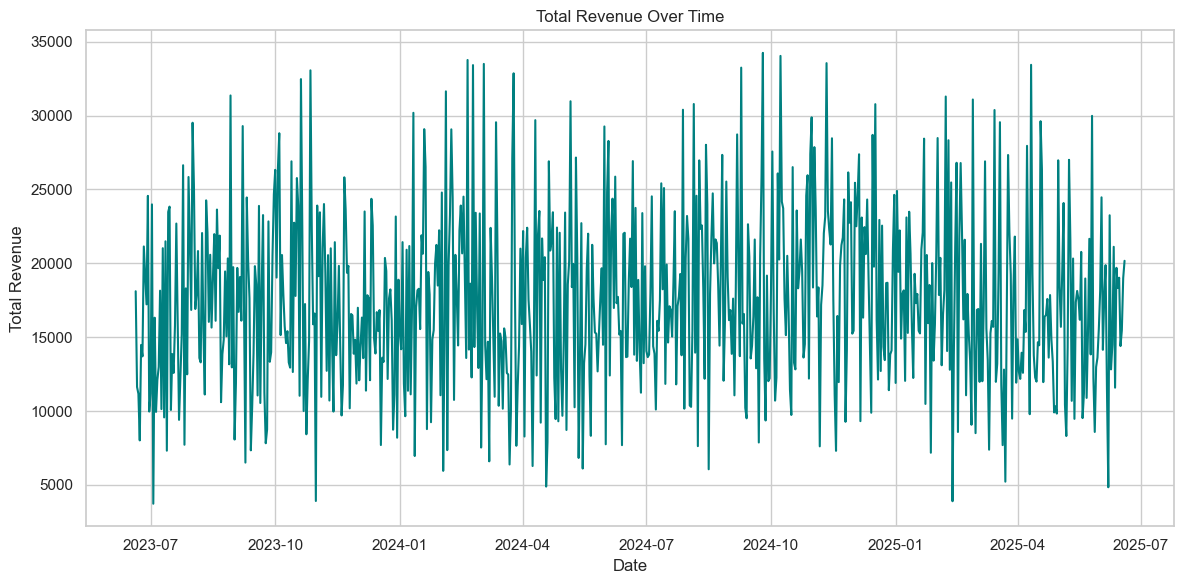

In [57]:
# Aggregate daily total revenue
df_daily = sales_data.groupby('date')['total_revenue'].sum().reset_index()

# Plot total revenue over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_revenue', data=df_daily, color='teal')
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

## 🌍 Total Revenue by Region

This bar chart displays the sum of `total_revenue` for each `region`:

- It helps compare how different geographic areas contribute to overall revenue.
- Summing the revenue by region highlights regional performance disparities and potential focus areas.

The y-axis label indicates that revenue is measured in **millions**, making large-scale differences easier to interpret.

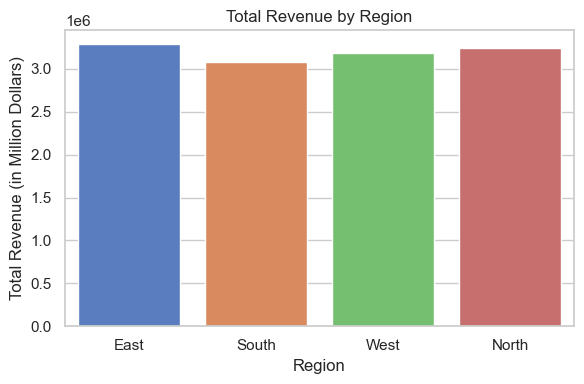

In [59]:
# Bar chart of total revenue by region (future-proofed for seaborn >=0.14)
plt.figure(figsize=(6, 4))
sns.barplot(
    x='region',
    y='total_revenue',
    hue='region',  # Assign the same variable to hue
    data=sales_data,
    estimator=sum,
    errorbar=None,
    palette='muted',
    legend=False  # Hides redundant legend
)
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (in Million Dollars)')
plt.tight_layout()
plt.show()


## 🏅 Top 10 Sales Representatives by Revenue

This horizontal bar chart shows the **top 10 sales representatives** ranked by their total revenue:

- Revenue is aggregated per rep using `groupby()`.
- The top 10 are selected using `nlargest()`.
- A horizontal layout improves readability, especially when names are long.

This chart helps identify your highest-performing team members.

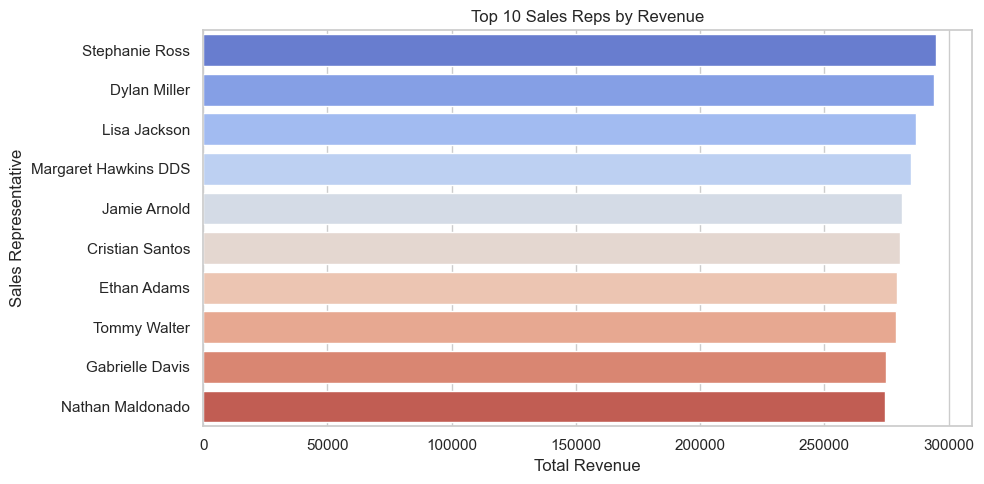

In [60]:
# Get the top 10 sales reps by total revenue
top_reps = (
    sales_data.groupby('sales_rep')['total_revenue']
    .sum()
    .nlargest(10)
    .reset_index()
)

# Plot the top 10 sales reps
plt.figure(figsize=(10, 5))
sns.barplot(
    x='total_revenue',
    y='sales_rep',
    hue='sales_rep',            
    data=top_reps,
    palette='coolwarm',
    legend=False
)
plt.title('Top 10 Sales Reps by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Sales Representative')
plt.tight_layout()
plt.show()
